In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [3]:
# Load Iris dataset
iris = load_iris()
data = iris.data
feature_names = iris.feature_names

In [5]:
# Drop species column (not needed for clustering)
# Already dropped since we're using iris.data

# Preprocess data (standardize features)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


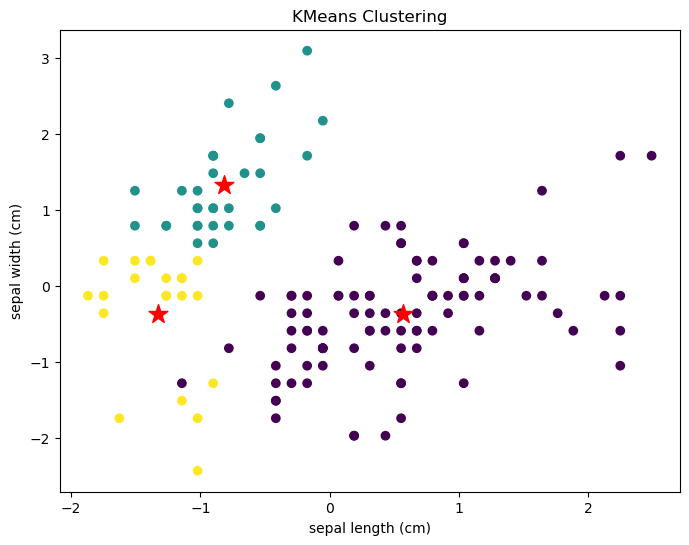

In [9]:
# Visualize KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker="*", s=200, c="red")
plt.title("KMeans Clustering")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

# Hierarchical Clustering
hclust = AgglomerativeClustering(n_clusters=3, linkage="ward")
hclust.fit(data_scaled)
hclust_labels = hclust.labels_

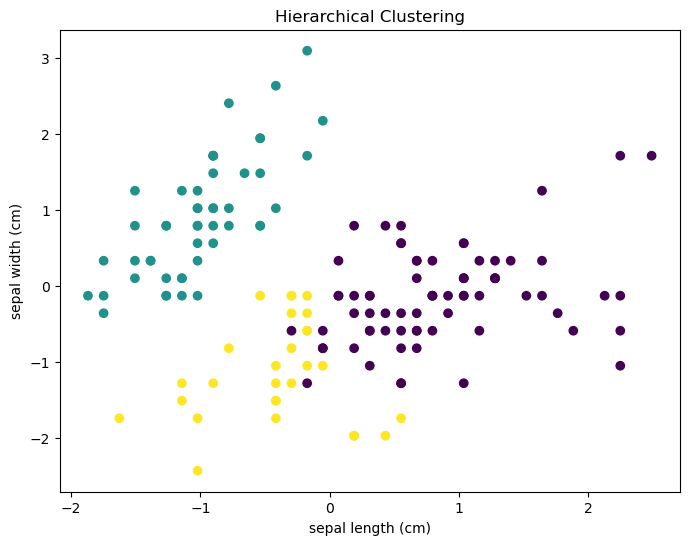

In [11]:
# Visualize Hierarchical clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hclust_labels)
plt.title("Hierarchical Clustering")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

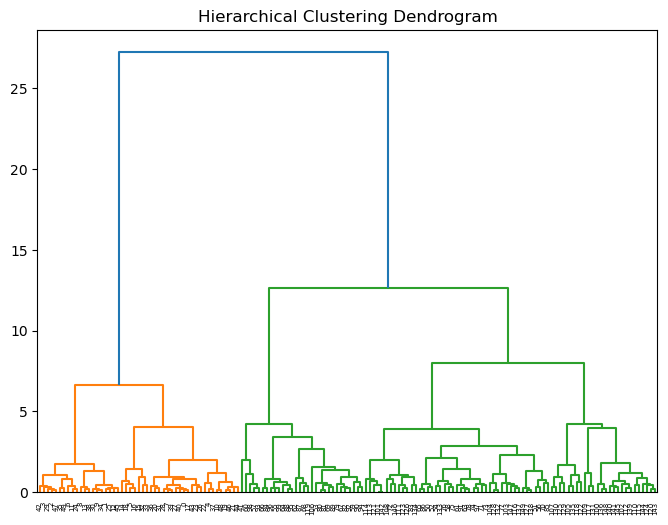

In [13]:
# Dendrogram for Hierarchical Clustering
Z = linkage(data_scaled, method="ward")
plt.figure(figsize=(8, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()
